In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
!ls -alt ..

total 1376
-rw------- 1 ldhagen ldhagen  11007 Jun  9 12:55  nohup.out
drwxr-xr-x 4 ldhagen ldhagen   4096 Jun  9 12:54  Texas_Covid_Data_Notebook
drwxr-xr-x 4 ldhagen ldhagen   4096 Jun  9 12:26  .
-rwxr-xr-x 1 ldhagen ldhagen  73996 Jun  9 12:24 'fixed Texas COVID-19 Active Case Data by County.xlsx'
-rw-r--r-- 1 ldhagen ldhagen  16414 Jun  8 20:38 'Texas COVID-19 Hospitalizations by TSA.xlsx'
-rw-r--r-- 1 ldhagen ldhagen  76453 Jun  8 20:37 'Cumulative Tests over Time by County.xlsx'
-rw-r--r-- 1 ldhagen ldhagen  74040 Jun  8 20:37 'Texas COVID-19 Active Case Data by County.xlsx'
-rw-r--r-- 1 ldhagen ldhagen  70518 Jun  8 20:37 'Texas COVID-19 Fatality Count Data by County.xlsx'
-rw-r--r-- 1 ldhagen ldhagen  84520 Jun  8 20:37 'Texas COVID-19 Case Count Data by County.xlsx'
drwxr-xr-x 4 ldhagen ldhagen   4096 Jun  7 20:24  ..
-rw-r--r-- 1 ldhagen ldhagen 955719 Jun  6 17:57  ME097_WS_San_Geronimo_180_D_2020_06_06_17_57_19_CDT_1.csv
drwxr-xr-x 2 ldhagen ldhagen   4096 Jun  4 19:59  .i

In [3]:
df_Texas_Covid_case = pd.read_excel("../fixed Texas COVID-19 Active Case Data by County.xlsx",header=2)

In [4]:
a = df_Texas_Covid_case.set_index('County')

In [5]:
b = a.T.Harris[a.columns[1:]]

In [6]:
a.T.Harris

Unnamed: 0                    †
Active\r\nCases\r\n4-7     1745
Active\r\nCases\r\n4-8     2017
Active\r\nCases\r\n4-9     2164
Active\r\nCases\r\n4-10    2852
                           ... 
Active\r\nCases\r\n6-3     7576
Active\r\nCases\r\n6-4     7723
Active\nCases\n6-5         7921
Active\nCases\n6-6         8104
Active\nCases\n6-8         8553
Name: Harris, Length: 63, dtype: object

count = 0
for x in a.T[1:]:
    

In [7]:
b.index[0].split('\n')[2].split('-')[0]

'4'

In [8]:
dated_dict = {}
count = 0
for x in b:
    month_temp = int(b.index[count].split('\n')[2].split('-')[0])
    day_temp = int(b.index[count].split('\n')[2].split('-')[1])
    dated_dict[datetime.datetime(2020, month_temp, day_temp)] = b[count]
    count += 1

In [9]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Active Cases'])

In [10]:
c = dated_df.set_index('Date')

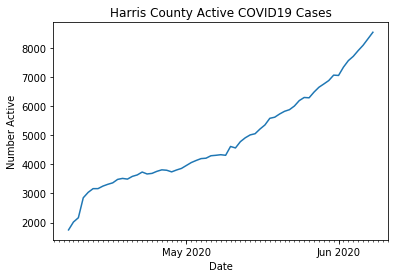

In [11]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Number Active',color='black')
plt.plot(c)
plt.title('Harris County Active COVID19 Cases')
plt.savefig('HarrisActive.png')